# Font <span class="girk">Generato</span>r
**Yusuf Fawzy Program**



# The Imports

In [13]:
import os
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from PIL import ImageFont, Image, ImageDraw
import numpy as np
import math
%matplotlib inline
import arabic_reshaper

from skimage.measure import structural_similarity as ssim, compare_ssim

# Get Font and Pics Names

In [22]:
from tqdm import tqdm
import numpy as np
for i in tqdm(range(10000)):
    pass


100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 1411700.72it/s]

'وثنية'

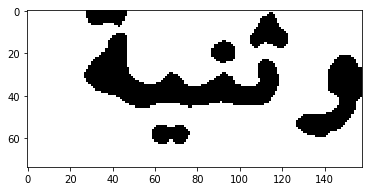

In [9]:
# old folder of Images
img_threshold_path = 'C:/Users\Yusuf\Desktop\ToManipulate\Photo'
txt_threshold_path = 'C:/Users\Yusuf\Desktop\ToManipulate\Text'
photo_names_threshold = os.listdir(img_threshold_path)
photo_text_threshold = os.listdir(txt_threshold_path)

joe = open(txt_threshold_path+'/'+photo_text_threshold[0], encoding='utf-8')
plt.imshow(Image.open(img_threshold_path+'/'+photo_names_threshold[0]))
open(txt_threshold_path+'/'+photo_text_threshold[0], encoding='utf-8').read()

In [10]:
fonts = []
#get all the fonts I have here
for i in os.listdir('.'):
    if i.endswith('.ttf'):
        fonts.append(i)
print(fonts)
print(len(fonts))

['AL-Mohanad-Bold.ttf', 'andlso.ttf', 'arial.ttf', 'arialbd.ttf', 'calibri.ttf', 'calibrib.ttf', 'calibril.ttf', 'cour.ttf', 'courbd.ttf', 'Greta-Arabic-Bold-Italic.ttf', 'majalla.ttf', 'majallab.ttf', 'micross.ttf', 'segoeui.ttf', 'segoeuib.ttf', 'segoeuil.ttf', 'segoeuisl.ttf', 'seguisb.ttf', 'Sp_Badr-Bold_p30download.com_.ttf', 'Sp_Badr_p30download.com_.ttf', 'Sp_Compset-Bold_p30download.com_.ttf', 'Sp_Lotus-Bold_p30download.com_.ttf', 'Sp_Nazanin-Bold_p30download.com_.ttf', 'Sp_Yagut-Bold_p30download.com_.ttf', 'tahoma.ttf', 'tahomabd.ttf', 'times.ttf', 'timesbd.ttf', 'tradbdo.ttf', 'trado.ttf', 'XB-KayhanBd.ttf']
31


# Getting the threshold of average of 60 photo

In [11]:
def get(data):
    data = np.array(data)
    return (data - data.mean()) / data.std()

1727.1318468491438
[(14, 'segoeuib.ttf')]


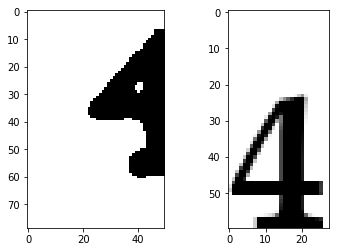

In [14]:
# Compare using CrossCorrelation
from scipy.signal.signaltools import correlate2d as c2d

matchedFont = []
matched_img = None
threshold = []
idx = 14
orig = Image.open(img_threshold_path+"/"+photo_names_threshold[idx])
txt_file = open(txt_threshold_path+'/' +
                photo_text_threshold[idx], encoding='utf-8')
txt_file = txt_file.read()
maxi = -10000
for i, f in enumerate(fonts):
    # know size of text image
    reshaped_text = arabic_reshaper.reshape(txt_file)
    bidi_text = get_display(reshaped_text)
    fnt = ImageFont.truetype(font=f, size=55)
    font_size = fnt.getsize(bidi_text)
    # make a blank image
    img = Image.new('L', (font_size[0], font_size[1]), (255))
    # draw the text into the blank image
    d = ImageDraw.Draw(img)
    d.text((0, 0), text=bidi_text, fill=(0), font=fnt)


#         plt.subplot(1,len(fonts),i+1)
#         plt.title(str(i) + f)
#         plt.imshow(img)

    c = c2d(get(img), get(orig), mode='same')
    if (c.max() > maxi):
        maxi = c.max()
        xx = (i, f)
# add the maxi of this particular photo with this particular font
threshold.append(maxi)
matchedFont.append(xx)

threshold = np.array(threshold)
Threshold = threshold.mean() - 2*(threshold.std())
print(Threshold)
print(matchedFont)
plt.subplot(1, 2, 1)
plt.imshow(orig)
plt.subplot(1, 2, 2)
plt.imshow(img)

[0] => 4252.28292196 , [(25, 'tahomabd.ttf')]
[1] => 7391.52415136 ,  [(25, 'tahomabd.ttf')]
[2] => 3699.80881344, [(25, 'tahomabd.ttf')]
[3] => 7088.87752797 ,  [(25, 'tahomabd.ttf')]
[4] => 2856.57038144 , [(14, 'segoeuib.ttf')]
[5] => 5401.14982765,   [(25, 'tahomabd.ttf')]
[6] => 3725.46951996 ,[(30, 'XB-KayhanBd.ttf')]
[7] => 1698.48127568 , [(14, 'segoeuib.ttf')]
[8] => 2708.69642605 ,[(25, 'tahomabd.ttf')]
[9] = > 5969.32074813,[(30, 'XB-KayhanBd.ttf')]
[10]=> 2935.66567586, [(25, 'tahomabd.ttf')]
[11]=> 2785.63695842,[(30, 'XB-KayhanBd.ttf')]
[12] => 5307.33961048, [(25, 'tahomabd.ttf')]
[13] => 2338.46479898,[(25, 'tahomabd.ttf')]
[14]=> 1727.13184685, [(14, 'segoeuib.ttf')]

In [15]:
#Compare using CrossCorrelation
from scipy.signal.signaltools import correlate2d as c2d

matchedFont = []
matched_img = None
threshold =[]

for p in range(60):
    orig = Image.open(img_threshold_path+"/"+photo_names_threshold[p])
    txt_file = open(txt_threshold_path+'/'+photo_text_threshold[p],encoding='utf-8')
    txt_file = txt_file.read()
    maxi = -10000
    #know size of text image
    reshaped_text = arabic_reshaper.reshape(txt_file)
    bidi_text = get_display(reshaped_text)
    fnt = ImageFont.truetype(font = fonts[25],size=55)
    font_size = fnt.getsize(bidi_text)
    #make a blank image
    img = Image.new('L',(font_size[0],font_size[1]),(255) )
    #draw the text into the blank image
    d = ImageDraw.Draw(img)
    d.text((0,0),text=bidi_text, fill=(0),font=fnt)


#         plt.subplot(1,len(fonts),i+1)
#         plt.title(str(i) + f)
#         plt.imshow(img)

    c= c2d(get(img), get(orig),mode='same')
    
    #add the maxi of this particular photo with this particular font
    threshold.append(c.max())
    
threshold=np.array(threshold)    
Threshold = threshold.mean() - 2*(threshold.std())
print(Threshold)
print(threshold)


-125.22429506823119
[4252.28292196 7391.52415136 3699.80881344 7088.87752797 2126.16869685
 5401.14982765 2388.65070973 1654.84499005 2708.69642605 5470.96605769
 2935.66567586 2760.39846873 5307.33961048 2338.46479898 1625.86674455
 4110.62038299  729.17443107  877.28183259 2802.09542334  936.84973224
 2240.44383412 6531.72742836 3668.04725577 7664.17789049  364.54380107
 6011.49257804 3616.64732266 4087.87522289 7253.28999019 7791.25755855
 3394.68797086 2573.34337405 5330.842101   2114.94034371 2219.93437351
 4770.70989158 5736.35283622 4729.62049916 3944.08547672 4914.59254145
 1628.32071753 4406.281457   2846.52628627 5689.66980916 3220.0361439
 2786.4975538  6611.06267189 2140.13327078 2628.2956218   949.66966121
 5807.11090806 5640.30562101 6353.98445188 3797.33956041 7412.18811612
 2038.57738897 5475.75534679  571.20774508 5857.54707399 2634.30491781]


In [75]:
print( threshold.mean() - 1.5*(threshold.std()))
Threshold =  threshold.mean() - 1.5*(threshold.std())
Threshold


881.332419688


881.33241968831862

<a id='comp'/>

# Comparing Images 


In [52]:
image_folders_names = ['abwab','adab el rafydan','afaq arabya','el adib','el doha','el helal','el mnar','el qesa']
image_names =[]
text_names=[]
pathImage ="C:/Users/Yusuf/Desktop/RDI Data/test_data/words_images_new/"
pathText = "C:/Users/Yusuf/Desktop/RDI Data/test_data/words_text/"
for i,name in enumerate(image_folders_names):
    image_names.append([]); text_names.append([])
    for photo_name in os.listdir(pathImage +name):
        image_names[i].append(photo_name)
        text_names[i].append(photo_name[:-3]+'txt')
print(len(image_names[0]))

4000


In [79]:
#Compare using CrossCorrelation
count = 0
C_matrices=[]
matched_font = None
mismatched = []
matched_img = None
#plt.figure(figsize=(100,100))
for j,pic_name in enumerate(image_names[3][:500]):
    orig = Image.open(pathImage+image_folders_names[3]+'/'+pic_name)
    txt_file = open(pathText+image_folders_names[3]+'/'+text_names[3][j],encoding='utf-8')
    txt_file = txt_file.read()
    
    #know size of text image
    reshaped_text = arabic_reshaper.reshape(txt_file)
    bidi_text = get_display(reshaped_text)
    fnt = ImageFont.truetype(font =fonts[25],size=55)
    font_size = fnt.getsize(bidi_text)
    #make a blank image
    img = Image.new('L',(font_size[0],font_size[1]),(255))
    #draw the text into the blank image
    d = ImageDraw.Draw(img)
    d.text((0,0),text=bidi_text, fill=(0),font=fnt)

    c= c2d(get(img), get(orig),mode='same')
    
    # if (compare_ssim(np.array(orig),np.array(img))<minn):
    if (c.max()>Threshold):
        count+=1
    else :
        print(c.max(),pic_name)
        mismatched.append(pic_name)
    C_matrices.append(c.max())
#count = count  / len(image_names[0])
print('the mismatched photos names are :')
print(mismatched)

#plt.imshow(c)
#print(compare_ssim(np.array(matched_img),np.array(orig)))

35.8317663411 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line0_w7.bmp
96.2479126982 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line12_w3.bmp
662.340525784 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line13_w3.bmp
416.35790093 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line15_w13.bmp
38.2245200195 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line15_w6.bmp
594.062869315 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line17_w2.bmp
778.569642827 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line19_w12.bmp
578.400385334 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line19_w3.bmp
602.758219199 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line20_w3.bmp
541.595565289 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line25_w3.bmp
717.157646225 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line39_w5.bmp
-1.01663122365e-12 Al-ADIB_Al-ADIB_book_al-adib_al-adib_1942_issue_7_030_Line41_w7.bmp
11.70138589

In [73]:
# 453.948913507 EL_qesa_book_al_arabi_al_arabi_1961_issue_26_068_Line37_w6.bmp
# 843.958251877 EL_qesa_book_al_arabi_al_arabi_1961_issue_26_068_Line63_w0.bmp
# 610.333329028 EL_qesa_book_al_arabi_al_arabi_1961_issue_26_068_Line63_w4.bmp
# 798.87443925 EL_qesa_book_al_arabi_al_arabi_1961_issue_26_068_Line74_w3.bmp
# 861.566020036 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line10_w5.bmp
# 822.28539964 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line14_w3.bmp
# 266.190790957 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line14_w6.bmp
# 166.414639687 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line17_w6.bmp
# 335.921338433 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line19_w11.bmp
# 776.865611834 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line19_w3.bmp
# 147.172071818 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line20_w7.bmp
# 741.91885621 EL_qesa_book_al_arabi_al_arabi_1961_issue_37_065_Line25_w3.bmp

76


In [69]:
Al-ADIB_Al-ADIB_book_al-adib_al-adib_1948_issue_1_036_Line5_w1

76


In [37]:
n_book = 1 
n_sample = 55
print(image_names[n_book][n_sample])
print(text_names[n_book][n_sample])

Adab_AL_Rafidayn_Adab_AL_Rafidayn_book_adab_al_rafidayn_adab_al_rafidayn_1977_issue_8_386_Line15_w0.bmp
Adab_AL_Rafidayn_Adab_AL_Rafidayn_book_adab_al_rafidayn_adab_al_rafidayn_1977_issue_8_386_Line15_w0.txt
